# Customer Segmentation using Kmeans

A good personalised relationship with the customers is crucial for the success of a company. Customer segmentation helps a firm to segment its customers into different categories based on their needs, spending habits, financial condition and other relevant factors. This helps a firm to analyze the requirements of it customer base and along with their interests, lifestyles, priorities and learn their spending habits which can be used in planning its customer acquisition and retention plans. Customer Segmentation is a key step in the process of fine tuning marketing strategies and helps in increasing revenues of the firm as customers recieve marketing policies for only those products which they need.

In this notebook we will analyze and segment the customers of a store in order to help them better understand their consuers so that they strategize accordingly and increase their revenue

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
df = pd.read_csv(r"C:\Users\amirt\Downloads\Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# let's change the name of the columns to make it easier for analysis
df.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "Score", "Genre": "Gender"}, inplace=True)

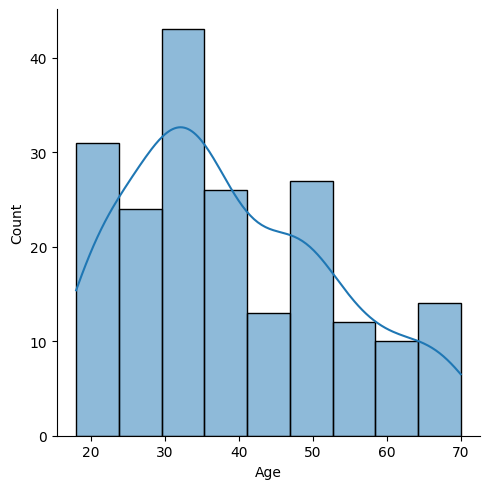

In [7]:
# distribution of age
sns.displot(x='Age', data=df, kde=True)

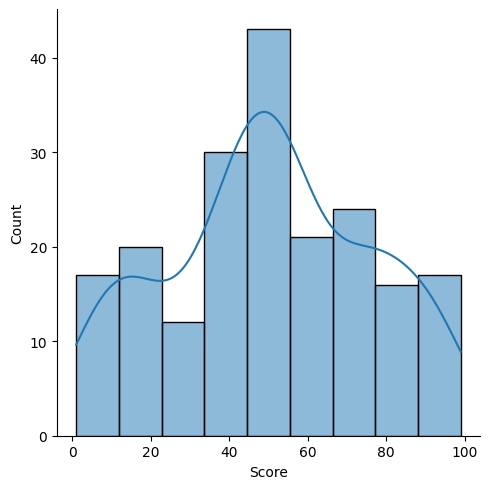

In [8]:
# distribution of spending score
sns.displot(x='Score', data=df, kde=True)

<AxesSubplot: xlabel='Gender', ylabel='count'>

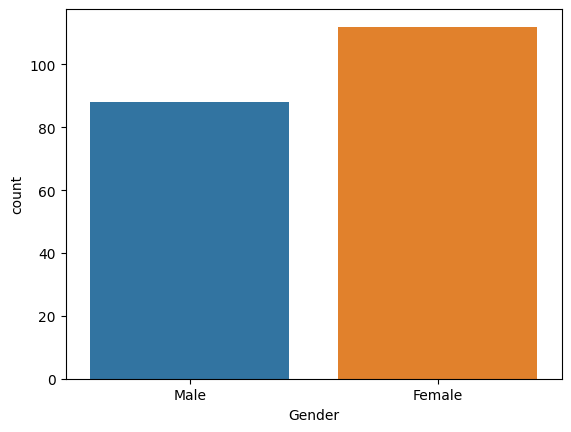

In [9]:
# distribution of categorical variable
sns.countplot(x='Gender', data=df)

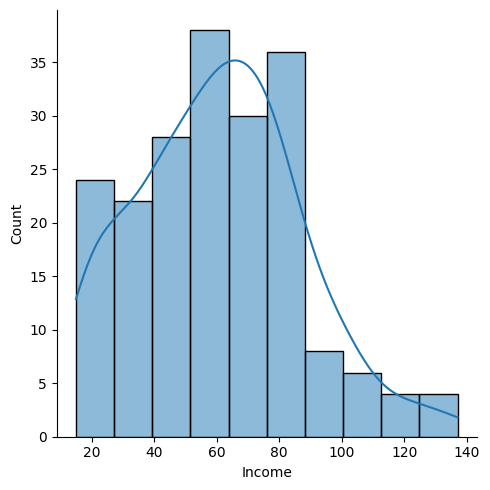

In [10]:
# distribution of annual income
sns.displot(x='Income', data=df, kde=True)

In [11]:
X= df.iloc[:, [3,4]].values

In [12]:
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

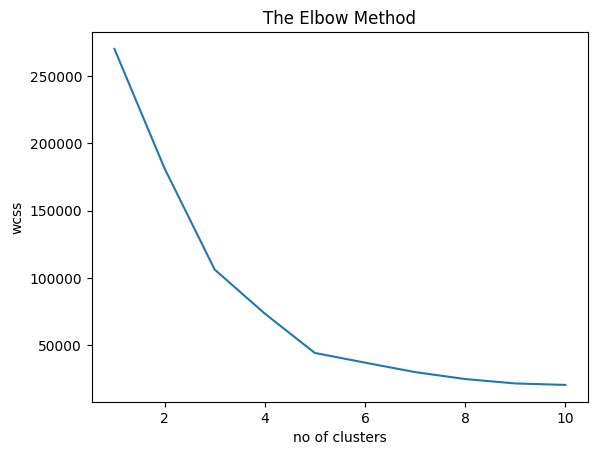

In [13]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [14]:
#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

The Silhouette score in the K-Means clustering algorithm is between -1 and 1. This score represents how well the data point has been clustered, and scores above 0 are seen as good, while negative points mean your K-means algorithm has put that data point in the wrong cluster.

In [15]:
silhouette_score_average = silhouette_score(X, kmeansmodel.predict(X))
silhouette_score_average

0.553931997444648

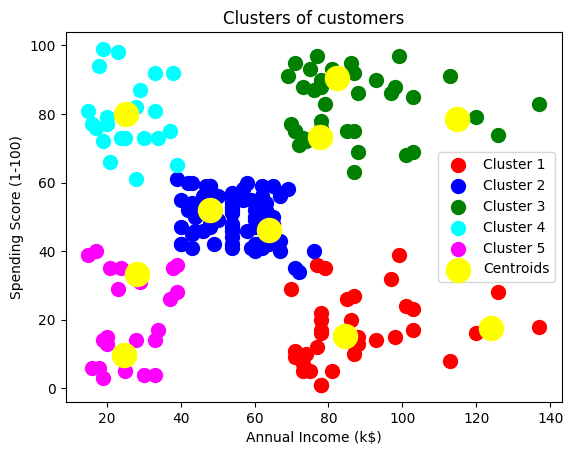

In [16]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Model Interpretation 
Cluster 1 (Red Color) -> earning high but spending less
cluster 2 (Blue Colr) -> average in terms of earning and spending 
cluster 3 (Green Color) -> earning high and also spending high TARGET SET
cluster 4 (cyan Color) -> earning less but spending more
Cluster 5 (magenta Color) -> Earning less , spending less


We can put Cluster 3 into some alerting system where email can be send to them on daily basis as these re easy to converse
wherein others we can set like once in a week or once in a month